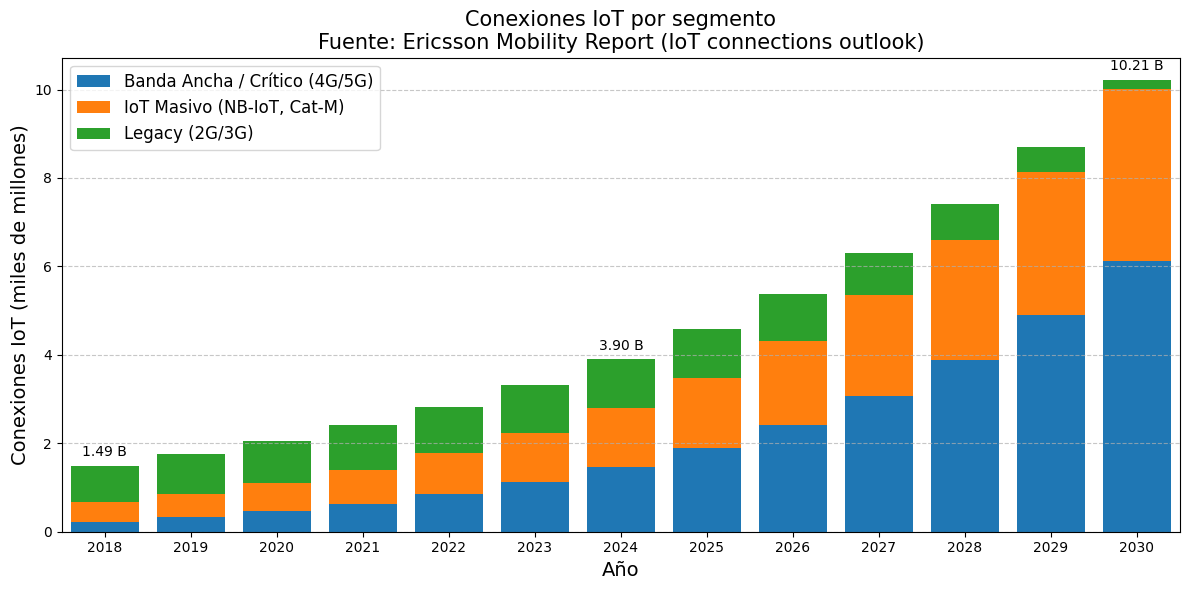

[Descargar figura en PDF](in_band_1.pdf)


In [11]:
# Genero aquí un cuaderno (celdas de código) que crea la figura replicando, con aproximaciones transparentes,
# la gráfica "Cellular IoT connections by segment and technology" de Ericsson.
# Datos exactos usados donde están disponibles (valores 2024 y 2030) y supuestos explícitos para 2018-2023.
# - Fuente: Ericsson Mobility Report (IoT connections outlook):
#   https://www.ericsson.com/en/reports-and-papers/mobility-report/dataforecasts/iot-connections-outlook
# - Notas sobre aproximaciones:
#   * Ericsson indica "just over 1 billion in 2018" → usamos 1.05 (billion) como punto de partida 2018.
#   * Ericsson da valores exactos para 2024 (cellular = 3.9) y 2030 (cellular = 7.2), y afirma ~60% broadband by 2030.
#   * Para reconstruir la serie 2018–2030: ajustamos un crecimiento exponencial entre 2018 y 2030
#     para obtener totales anuales, y modelamos la participación (share) de cada segmento (legacy, massive, broadband)
#     como una transición lineal entre porcentajes plausibles en 2018 y las cifras objetivo en 2030
#     (legacy declinando, broadband aumentando al ~60%, massive = resto).
#   * Estas decisiones se explicitan más abajo y pueden modificarse si quieres que use otros supuestos.
#
# El resultado es una gráfica tipo "stacked bar" para 2018–2030. Si quieres la versión que solo usa
# datos verificados (por ejemplo, la tabla 2024 vs 2030) dímelo y la pongo en lugar de la aproximación.
#
# Ejecuta este bloque en Jupyter para ver la figura (ya se ejecuta aquí y se muestra la imagen).

import numpy as np
import matplotlib.pyplot as plt

# Años
years = np.arange(2018, 2031)

# Puntos de referencia (billions)
total_2018 = 1.05   # "just over 1 billion" -> aproximación
total_2024 = 3.9    # dato Ericsson
total_2030 = 7.2    # dato Ericsson

# Ajuste exponencial entre 2018 y 2030 para obtener totales anuales
# total(t) = A * exp(k*(t-2018))
t0 = 2018
A = total_2018
k = np.log(total_2030 / A) / (2030 - t0)
totals = A * np.exp(k * (years - t0))

# Escalamos ligeramente para que el punto 2024 coincida exactamente con el dato de Ericsson (3.9)
# conservando la forma exponencial: multiplicador m tal que totals[year==2024]*m = total_2024
m = total_2024 / totals[years == 2024][0]
totals *= m

# Verificación rápida
# print("Total 2018,2024,2030:", totals[0], totals[years.tolist().index(2024)], totals[-1])

# Modelado de participaciones por segmento (shares)
# Supuestos (explicados en la celda de comentario arriba):
# - En 2018: legacy mayoritario, broadband minoritario, massive intermedio.
#   Elegimos 2018 shares (plausibles): legacy 0.55, massive 0.30, broadband 0.15
# - En 2030: Ericsson indica ~60% broadband of cellular; legacy cerca de 0.02; massive = remainder
share_2018 = np.array([0.55, 0.30, 0.15])  # [legacy, massive, broadband]
share_2030 = np.array([0.02, 0.38, 0.60])

# Interpolación lineal de shares año a año
fractions = np.array([np.linspace(share_2018[i], share_2030[i], len(years)) for i in range(3)]).T

# Comprobar que suman 1
# print(np.allclose(fractions.sum(axis=1), 1.0))

# Valores absolutos por segmento
legacy = totals * fractions[:,0]
massive = totals * fractions[:,1]
broadband = totals * fractions[:,2]

# Plot stacked bar
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(years, broadband, label='Banda Ancha / Crítico (4G/5G)')
ax.bar(years, massive, bottom=broadband, label='IoT Masivo (NB-IoT, Cat-M)')
ax.bar(years, legacy, bottom=broadband+massive, label='Legacy (2G/3G)')

ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Conexiones IoT (miles de millones)', fontsize=14)
ax.set_title('Conexiones IoT por segmento\nFuente: Ericsson Mobility Report (IoT connections outlook)',fontsize=15)
ax.set_xticks(years)
ax.set_xlim(2017.5, 2030.5)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7) # Add grid

# Annotar algunos valores claves
for i, y in enumerate(years):
    if y in (2018, 2024, 2030):
        ax.text(y, totals[i] + 0.15, f'{totals[i]:.2f} B', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Guardar figura y dar enlace de descarga
figpath = 'in_band_1.pdf'
fig.savefig(figpath, format='pdf')
print(f"[Descargar figura en PDF]({figpath})")